# Humanitarian Aid Prediction Project
Author: George Gichure

This notebook demonstrates how data science and machine learning can be applied to predict humanitarian aid needs using a dummy dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## 1. Simulate Dummy Dataset

In [9]:
np.random.seed(42)
countries = [f"Country_{i}" for i in range(1, 51)]

data = {
    "Country": countries,
    "Population": np.random.randint(1, 100, 50),  # in millions
    "Disaster_Frequency": np.random.randint(0, 10, 50),
    "Healthcare_Access": np.random.rand(50),
    "GDP_per_Capita": np.random.randint(500, 20000, 50)
}

df = pd.DataFrame(data)

df["Aid_Units_Needed"] = (
    df["Population"] * 1000
    + df["Disaster_Frequency"] * 5000
    - df["Healthcare_Access"] * 8000
    + np.random.randint(0, 10000, 50)
).astype(int)

df.head()

,Country,Population,Disaster_Frequency,Healthcare_Access,GDP_per_Capita,Aid_Units_Needed
0,Country_1,52,3,0.729007,7276,64078
1,Country_2,93,8,0.771270,9974,128563
2,Country_3,15,1,0.074045,8026,21250
3,Country_4,72,9,0.358466,6030,122812
4,Country_5,61,8,0.115869,4248,103049


## 2. Exploratory Data Analysis

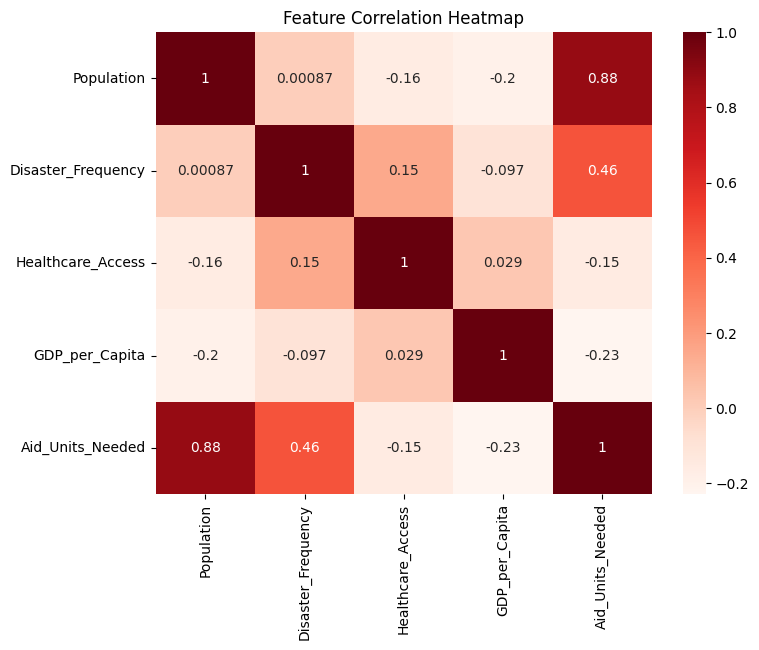

/tmp/ipython-input-2670097458.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Disaster_Frequency", y="Aid_Units_Needed", data=df, palette="Reds")


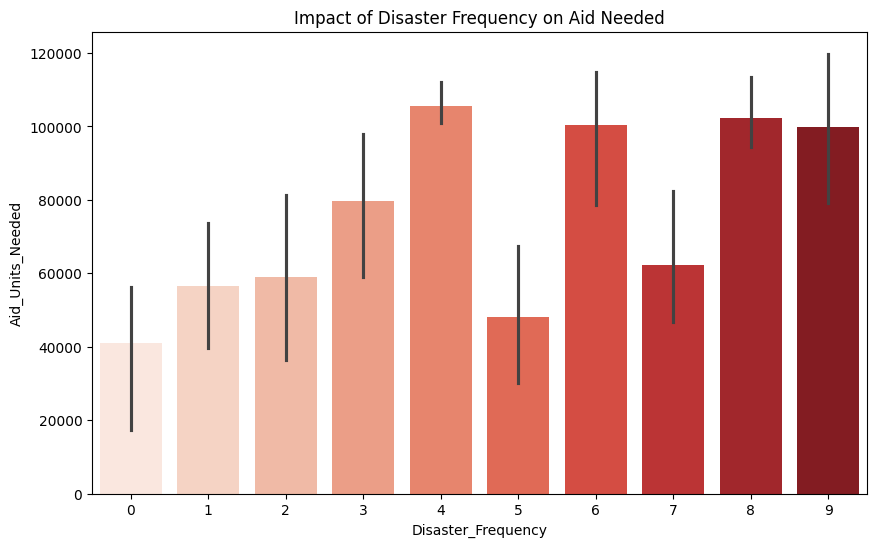

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop("Country", axis=1).corr(), annot=True, cmap="Reds")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Disaster_Frequency", y="Aid_Units_Needed", data=df, palette="Reds")
plt.title("Impact of Disaster Frequency on Aid Needed")
plt.show()

## 3. Train-Test Split

In [11]:
X = df[["Population", "Disaster_Frequency", "Healthcare_Access", "GDP_per_Capita"]]
y = df["Aid_Units_Needed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Model Training & Testing

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

results

{'Linear Regression': {'MAE': 1964.9515883820336,
  'RMSE': np.float64(2254.4087898471316),
  'R²': 0.9929591889155283},
 'Random Forest': {'MAE': 9620.015000000003,
  'RMSE': np.float64(12539.832419303297),
  'R²': 0.7821583996063615},
 'Gradient Boosting': {'MAE': 6476.284004325721,
  'RMSE': np.float64(8857.635493939804),
  'R²': 0.8913091556909886}}

## 5. Recommendation

In [13]:
best_model = min(results.items(), key=lambda x: x[1]["RMSE"])
print(f"Recommended Model: {best_model[0]} with RMSE = {best_model[1]['RMSE']:.2f}")

Recommended Model: Linear Regression with RMSE = 2254.41
